# **Capstone project: Providing data-driven suggestions for HR**

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

## Step 1. Imports


### Import packages

In [1]:
# Import packages
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

### Load dataset

In [2]:
# Load dataset into a dataframe
df0 = pd.read_csv("HR_capstone_dataset.csv")

# Display first few rows of the dataframe
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
df0.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
df0.describe()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
df0.rename(columns={
    'Work_accident':'work_accident',
    'Department':'department',
    'promotion_last_5years':'has_promotion',
    'average_montly_hours': 'avg_monthly_hrs',
    'time_spend_company': 'tenure',
    'last_evaluation': 'perf_score'
                   },
           inplace=True
          )

# Display all column names after the update
df0.columns

Index(['satisfaction_level', 'perf_score', 'number_project', 'avg_monthly_hrs',
       'tenure', 'work_accident', 'left', 'has_promotion', 'department',
       'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values
df0.isnull().sum()

satisfaction_level    0
perf_score            0
number_project        0
avg_monthly_hrs       0
tenure                0
work_accident         0
left                  0
has_promotion         0
department            0
salary                0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
df0.duplicated().sum()


3008

In [9]:
# Inspect some rows containing duplicates as needed
df0[df0.duplicated()].sort_values(by=['satisfaction_level', 'perf_score', 'number_project', 'avg_monthly_hrs',
       'tenure', 'work_accident', 'left', 'has_promotion', 'department', 'salary'])


,satisfaction_level,perf_score,number_project,avg_monthly_hrs,tenure,work_accident,left,has_promotion,department,salary
12030,0.09,0.62,6,294,4,0,1,0,accounting,low
14241,0.09,0.62,6,294,4,0,1,0,accounting,low
12071,0.09,0.77,5,275,4,0,1,0,product_mng,medium
14282,0.09,0.77,5,275,4,0,1,0,product_mng,medium
12652,0.09,0.77,6,290,4,0,1,0,technical,medium
...,...,...,...,...,...,...,...,...,...,...
13283,1.00,0.86,2,264,3,0,0,0,IT,medium
12916,1.00,0.86,4,245,4,0,0,0,sales,medium
13089,1.00,0.88,6,201,4,0,0,0,technical,low
13586,1.00,0.93,5,167,3,0,0,0,sales,medium


In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df = df0.drop_duplicates(keep='first')

# Display first few rows of new dataframe as needed
df.head()

,satisfaction_level,perf_score,number_project,avg_monthly_hrs,tenure,work_accident,left,has_promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [11]:
df.duplicated().sum()

0

### Check outliers

Check for outliers in the data.

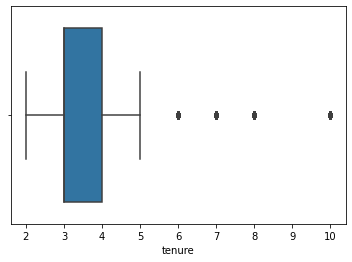

In [12]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
sns.boxplot(data=df,x='tenure')


In [13]:
# Determine the number of rows containing outliers

# Compute the 25th percentile value in `tenure`
percentile25 = df['tenure'].quantile(0.25)

# Compute the 75th percentile value in `tenure`
percentile75 = df['tenure'].quantile(0.75)

# Compute the interquartile range in `tenure`
iqr = percentile75 - percentile25

# Define the upper limit and lower limit for non-outlier values in `tenure`
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

# Identify subset of data containing outliers in `tenure`
outliers = df[(df['tenure'] > upper_limit) | (df['tenure'] < lower_limit)]

# Count how many rows in the data contain outliers in `tenure`
print(f"Number of rows in the data containing outliers in column `tenure`: {len(outliers)}")

Lower limit: 1.5
Upper limit: 5.5
Number of rows in the data containing outliers in column `tenure`: 824


# pAce: Analyze Stage



## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [14]:
# Get numbers of people who left vs. stayed
print(df['left'].value_counts())

# Get percentages of people who left vs. stayed
print(df['left'].value_counts(normalize=True))

0    10000
1     1991
Name: left, dtype: int64
0    0.833959
1    0.166041
Name: left, dtype: float64


### Data visualizations

First, we look at the distribution of each column to have an idea of the data we are dealing with.

In [15]:
categorical_feature = ['department','salary']
numerical_feature = ['satisfaction_level', 'perf_score', 'number_project', 'avg_monthly_hrs',
              'tenure', 'work_accident', 'has_promotion']

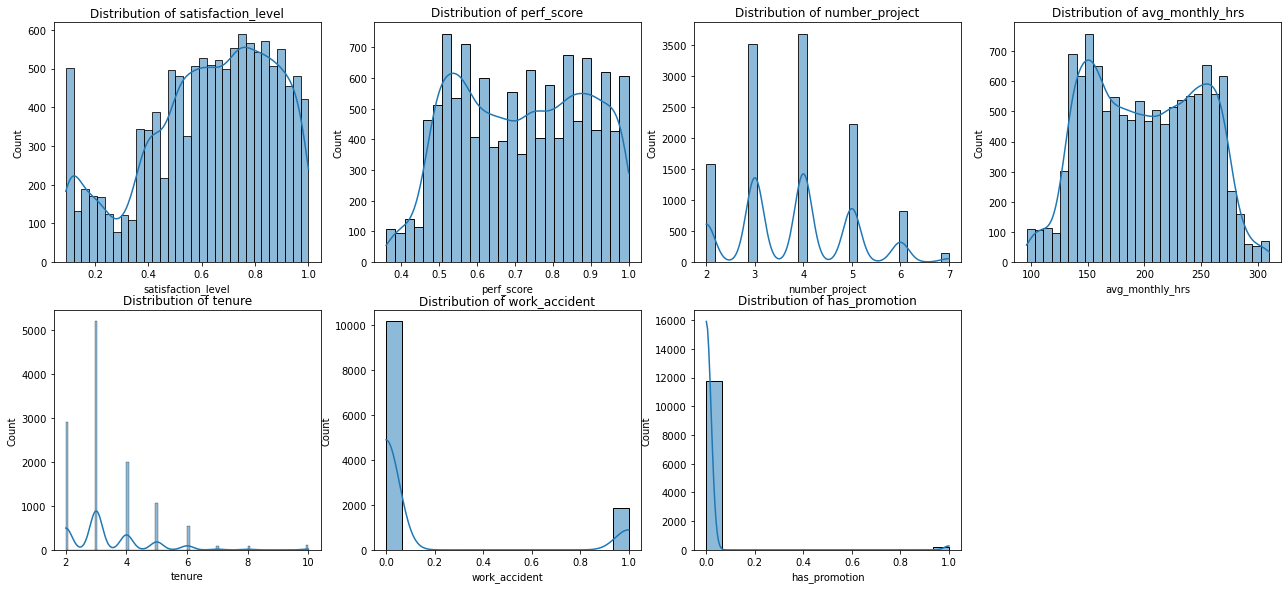

In [16]:
cols = 4
rows = 3

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(22, 5*rows))

# Flatten axes array for easy iteration if more than 1 row and 1 column
if rows * cols > 1:
    axes = axes.flatten()

# Plot distributions for each column
for i, col in enumerate(numerical_feature):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    
# Remove any empty subplots
for j in range(i + 1, rows * cols):
    fig.delaxes(axes[j])

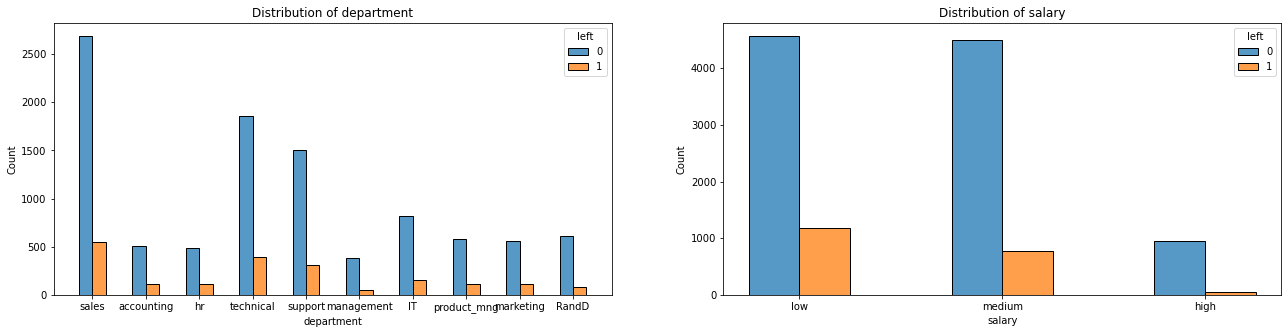

In [17]:
cols = 2
rows = 1

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(22, 5*rows))

# Flatten axes array for easy iteration if more than 1 row and 1 column
if rows * cols > 1:
    axes = axes.flatten()

# Plot distributions for each column
for i, col in enumerate(categorical_feature):
    sns.histplot(data=df, x=col, hue = 'left', discrete=1, 
             hue_order=[0, 1], multiple='dodge', shrink=.5, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    
# Remove any empty subplots
for j in range(i + 1, rows * cols):
    fig.delaxes(axes[j])

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

In [18]:
def plot_numerical(df, column_to_break): 
    levels = df[column_to_break].unique().tolist()
    for col in numerical_feature:  
        print('DISTRIBUTION OF {}'.format(str.upper(col)))
        fig, axes = plt.subplots(1,len(levels), figsize = (20, 5))
        axe = axes.ravel()

        for i, per in enumerate(levels):
            sns.histplot(df[(df[col] >= df[col].quantile(0.001)) & (df[col] <= df[col].quantile(0.999)) & (df[column_to_break] == per)][col],
                         kde=True, 
                         ax=axe[i],
                         bins=100)
            axe[i].set_title(f'DISTRIBUTION OF {i}')
#             df[(df[col] >= df[col].quantile(0.001)) & (df[col] <= df[col].quantile(0.999)) & (df[column_to_break] == per)][col].plot.hist(cumulative=True, bins=100, histtype='step', color='#d45800', ax = axe[i])
#             df[(df[col] >= df[col].quantile(0.001)) & (df[col] <= df[col].quantile(0.999)) & (df[column_to_break] == per)][col].plot.hist(rwidth=0.5, color='#607c8e', style = 'plain', title = 'DISTRIBUTION OF {}'.format(str.upper(str(per))), ax = axe[i], bins = 40)
            plt.gcf().axes[i].yaxis.get_major_formatter().set_scientific(False)
            plt.gcf().axes[i].xaxis.get_major_formatter().set_scientific(False)
            
        plt.tight_layout()
        plt.show()

DISTRIBUTION OF SATISFACTION_LEVEL


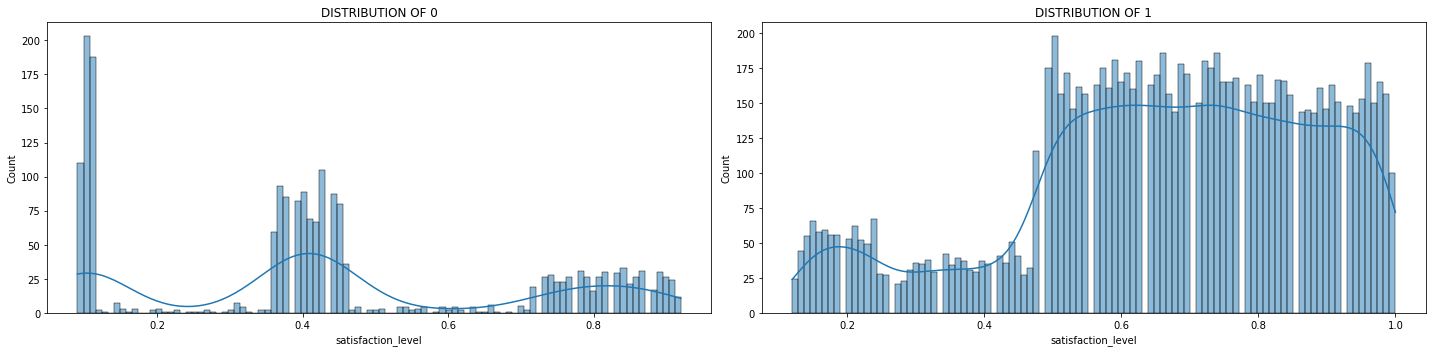

DISTRIBUTION OF PERF_SCORE


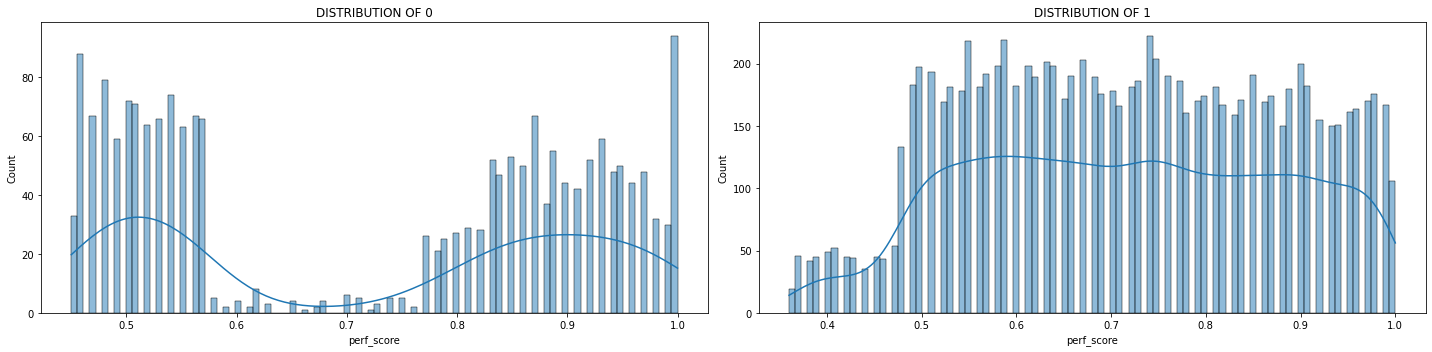

DISTRIBUTION OF NUMBER_PROJECT


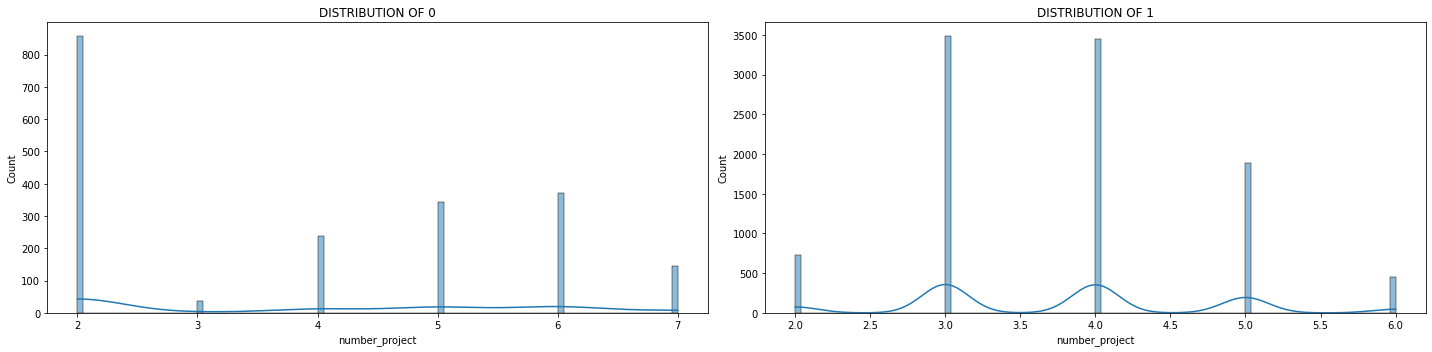

DISTRIBUTION OF AVG_MONTHLY_HRS


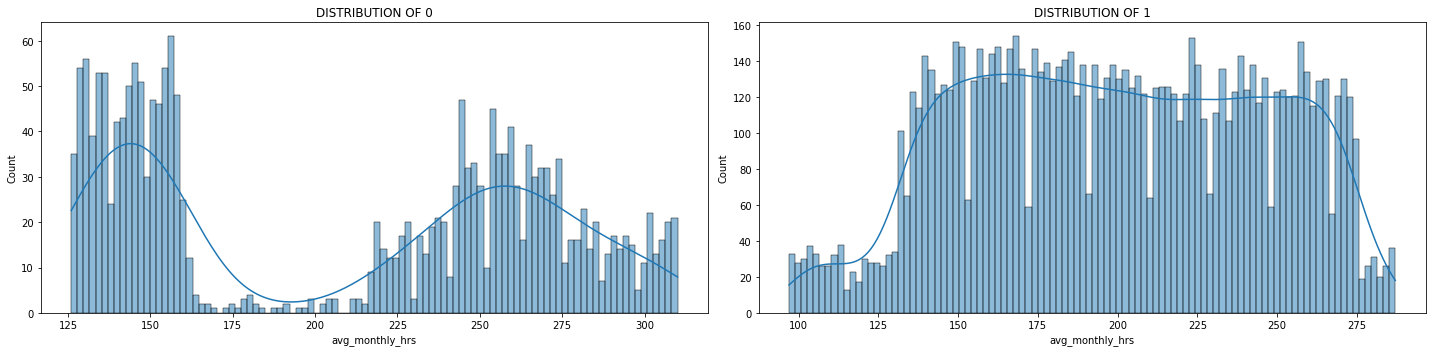

DISTRIBUTION OF TENURE


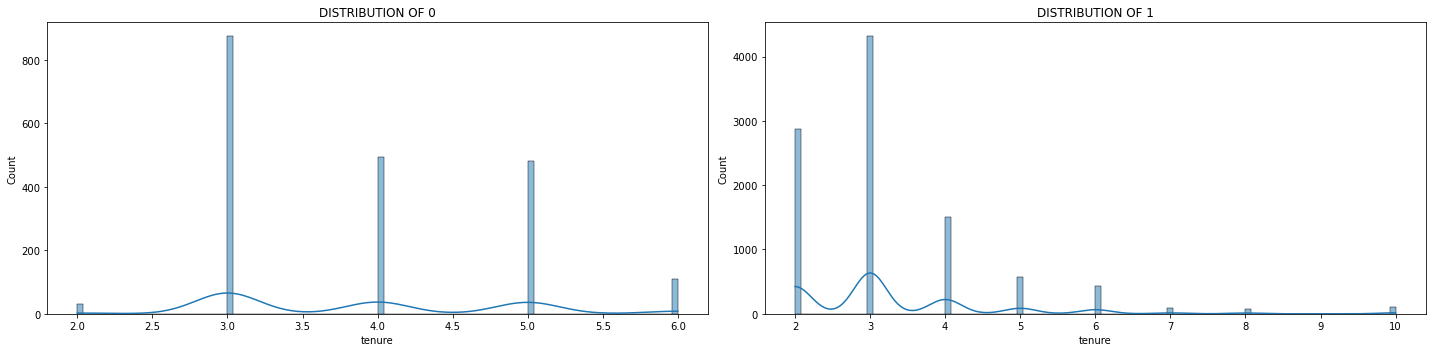

DISTRIBUTION OF WORK_ACCIDENT


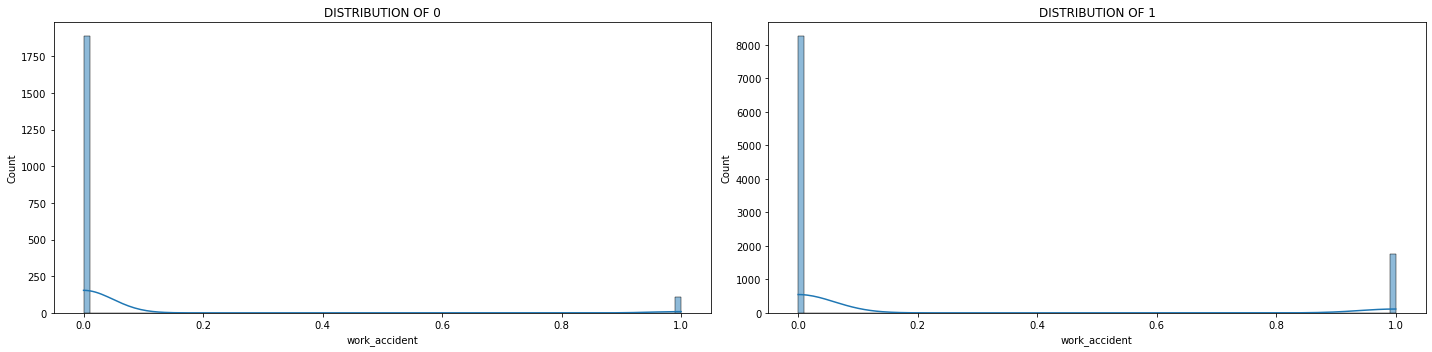

DISTRIBUTION OF HAS_PROMOTION


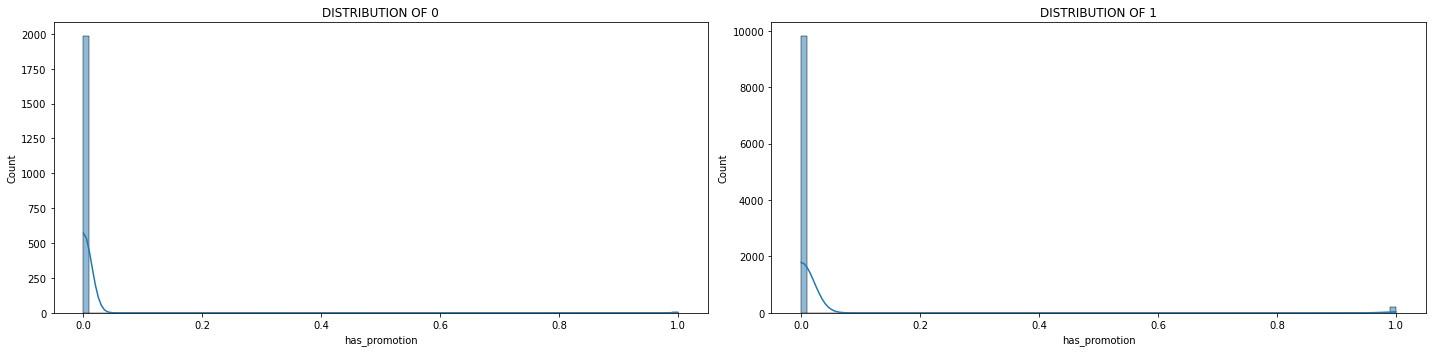

In [19]:
plot_numerical(df, 'left')

In [20]:
def plot_categorical(df, column_to_break):
    levels = df[column_to_break].unique().tolist()
    for col in categorical_feature:
        print('DISTRIBUTION OF {}'.format(str.upper(col)))
        fig, axes = plt.subplots(1,len(levels), figsize = (20,5))
        axes = axes.ravel()  
        
        for i, per in enumerate(levels):
            fig = sns.countplot(x = col, 
                                data=df[df[column_to_break] == per],
                                order = df[col].value_counts().index,
                                color='skyblue',
                                ax = axes[i])
            axes[i].set_title(f'DISTRIBUTION OF {i}')
            fig.set_xticklabels(fig.get_xticklabels(), rotation=90, ha="right")
            
        plt.tight_layout()    
        plt.show()

DISTRIBUTION OF DEPARTMENT


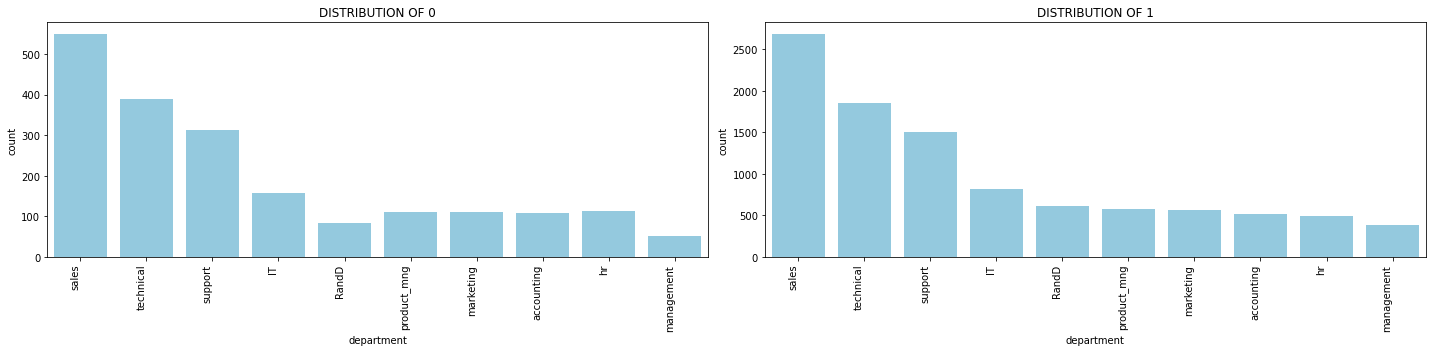

DISTRIBUTION OF SALARY


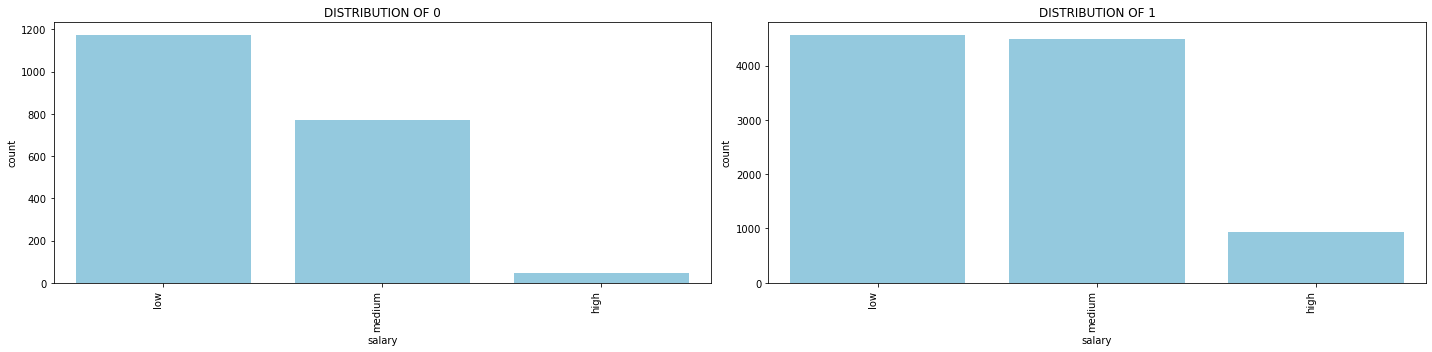

In [21]:
plot_categorical(df, 'left')

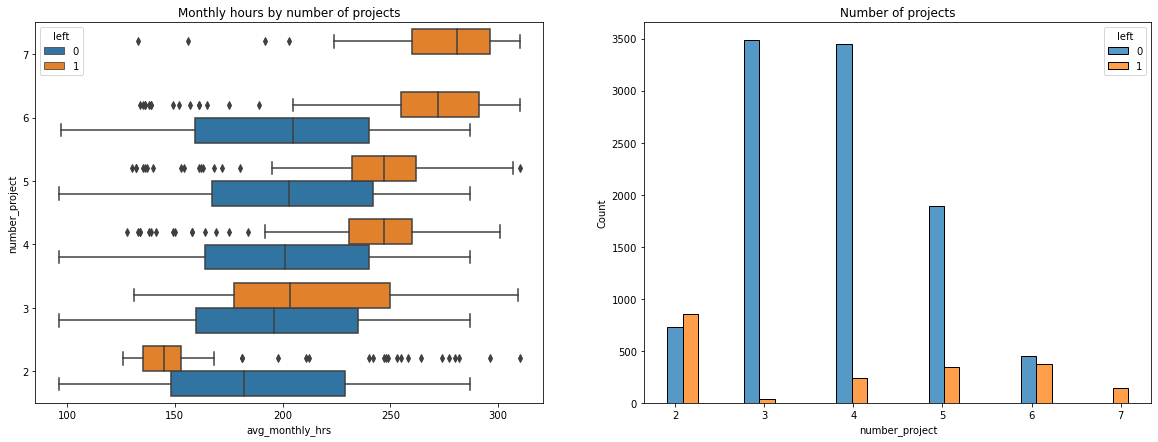

In [22]:
cols = 2
rows = 1

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(20, 7*rows))

# Create boxplot
sns.boxplot(data=df, x='avg_monthly_hrs', y='number_project', hue='left', orient="h", ax=axes[0])
axes[0].invert_yaxis()
axes[0].set_title('Monthly hours by number of projects')

# Create histplot
sns.histplot(data=df, x='number_project', hue='left', multiple='dodge', shrink=2, ax=axes[1])
axes[1].set_title('Number of projects')

# Show plot
plt.show()

From two plots above, we can observe the following:
- All employees that contributed to 7 projects have left.
- For employees that contributed from 4 to 6 projects, those doing more hours per month ended up leaving the company. However, we must also notice that there were outliers of those doing few hours but still choosing to leave.
- The highest number of employees leaving came from people who did only two projects.
- At 4-5 projects, the number of employees leaving was at the lowest rate.

Text(0.5, 1.0, 'Monthly hours by satisfaction level')

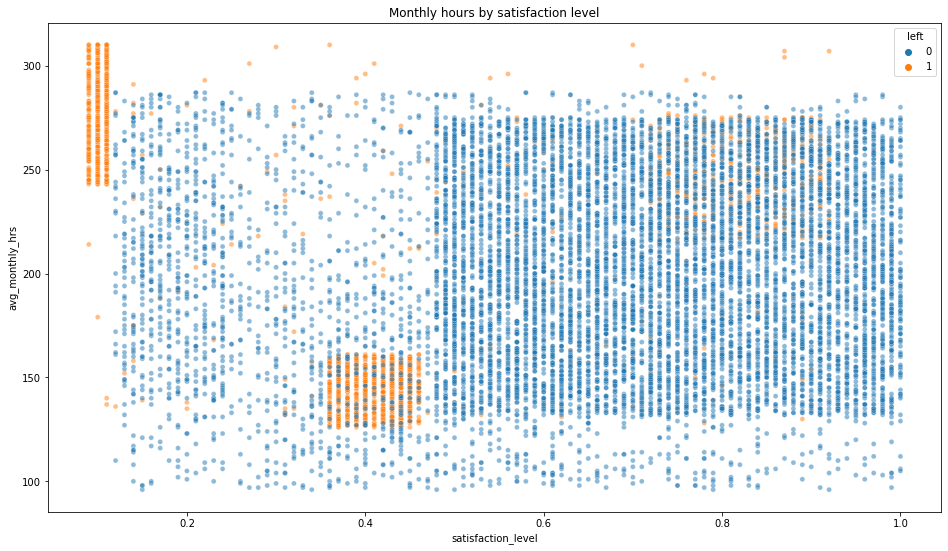

In [23]:
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df,x='satisfaction_level', y='avg_monthly_hrs', hue='left', s=25, alpha=0.5)
plt.title('Monthly hours by satisfaction level')

- We can see that there was a group of employees who left that worked an average ~240-320hours per month and had a satisfaction level of 0. Maybe this is the reason why they were dissatisfied with their job and decided to quit. 
- There was another group of employees that worked ~125-160 hours per month and had an average satisfaction of 0.35-0.45 but still decided to leave.

Text(0.5, 1.0, 'Monthly hours by Performance review score')

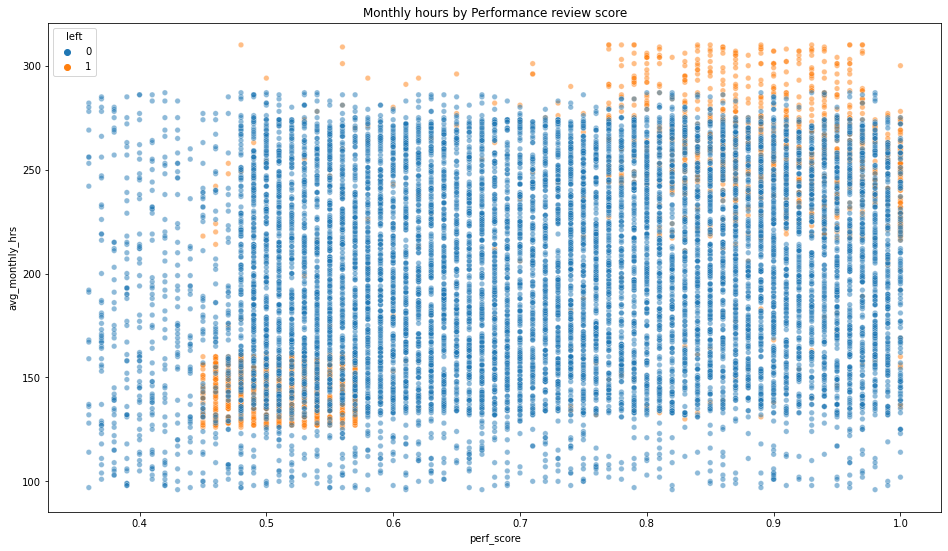

In [24]:
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df,x='perf_score', y='avg_monthly_hrs', hue='left', s=30, alpha=0.5)
plt.title('Monthly hours by Performance review score')

- Considering those who left, there were two obvious groups: 1) Employees who worked long hours and had high performance score, 2) Employees who worked under average hours and received low score in performance review. This makes sense and there seems to be a correlation.
- We can also see that working longer hours did not guarantee a high performance score.

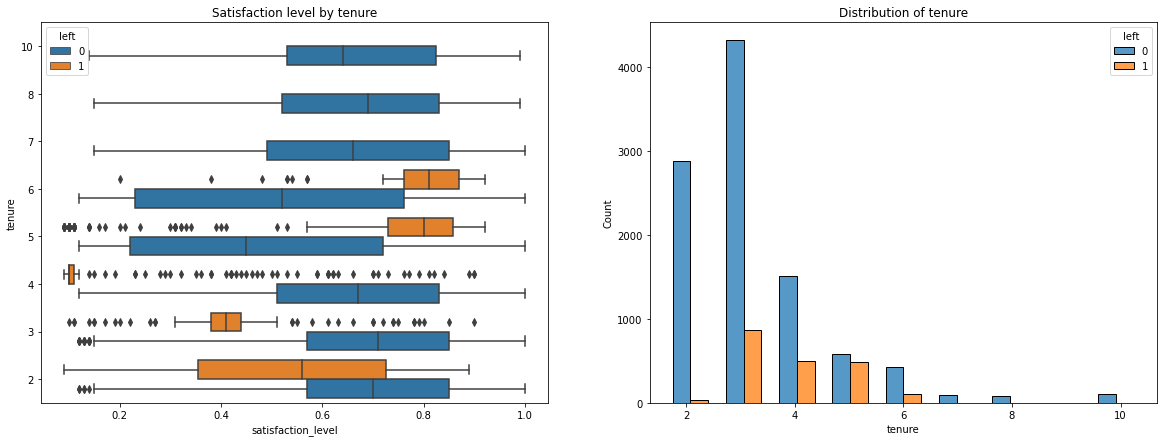

In [25]:
cols = 2
rows = 1

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(20, 7*rows))

# Create boxplot
sns.boxplot(data=df, x='satisfaction_level', y='tenure', hue='left', orient="h", ax=axes[0])
axes[0].invert_yaxis()
axes[0].set_title('Satisfaction level by tenure')

# Create histplot
sns.histplot(data=df, x='tenure', hue='left', multiple='dodge', shrink=4, ax=axes[1], bins=np.linspace(2,10))
axes[1].set_title('Distribution of tenure')

# Show plot
plt.show()

- At year 5, the number of employees who stayed and left were relatively similar.
- Approximately 25% of employees at year 3 leaves.
- At year 5-6, those who left had higher satisfaction level.
- At year 4, most of those who left had very low satisfaction level. We need to investigate more on this matter.

In [26]:
df.columns

Index(['satisfaction_level', 'perf_score', 'number_project', 'avg_monthly_hrs',
       'tenure', 'work_accident', 'left', 'has_promotion', 'department',
       'salary'],
      dtype='object')

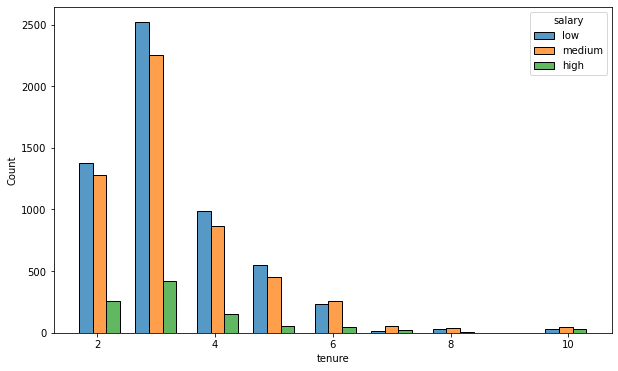

In [27]:
# Create histplot
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='tenure', hue='salary', multiple='dodge', shrink=8)

# Show plot
plt.show()

People who stay at the company longer did not necessarily was highly-compensated.

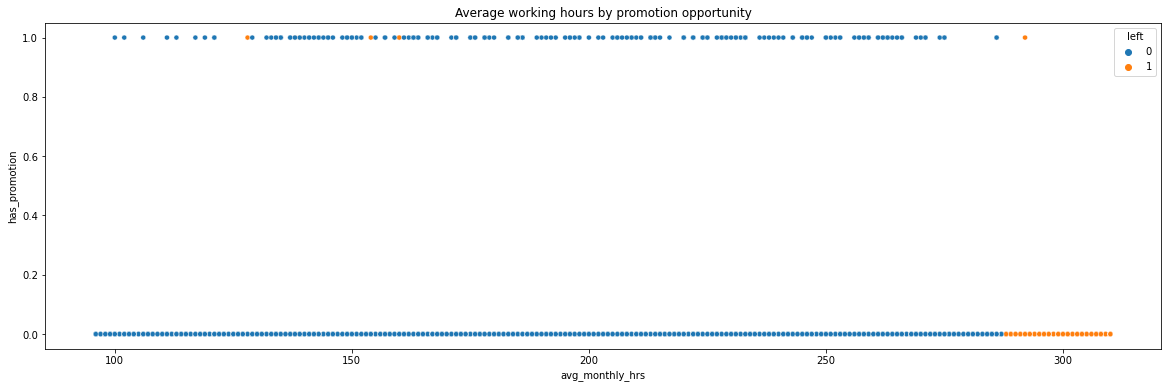

In [28]:
# Create boxplot
plt.figure(figsize=(20, 6))
sns.scatterplot(data=df, x='avg_monthly_hrs', y='has_promotion', hue='left', s=25)
plt.title('Average working hours by promotion opportunity')

# Show plot
plt.show()

- Very few people got promotion in the last 5 years.
- All of those who worked longer hours but did not get a promotion tended to leave.
- Almost those who got a promotion stayed.
- Promotion might be a reason that keep employees stay.

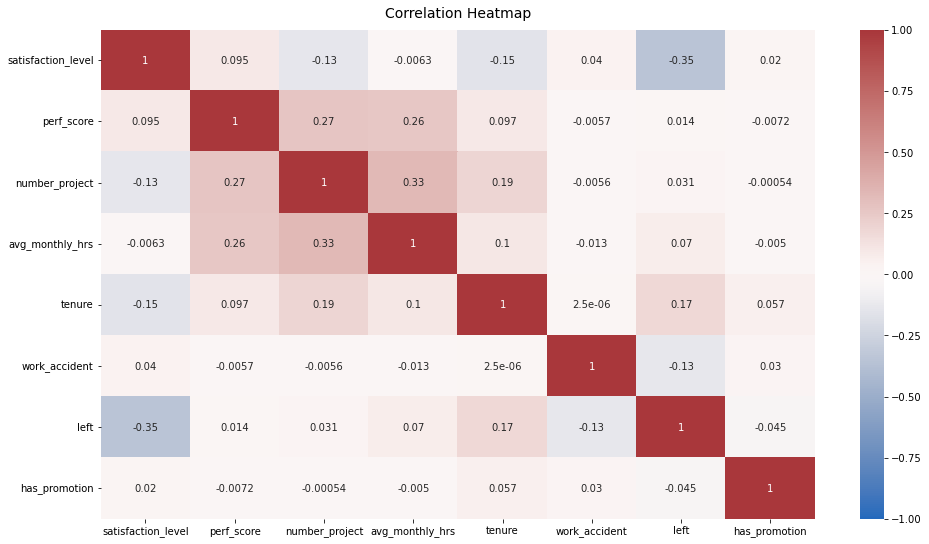

In [29]:
# Correlation heatmap
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

- No two variables are strongly correlated (correlation close to 1 or -1) so we don't have to remove any variable.

### Insights

Employees might leave because of long working hours, no promotion in the last five years, low satisfaction level.

# paCe: Construct Stage


## Step 3. Model Building, Step 4. Results and Evaluation


### Identify the type of prediction task.

This is a classification task where we have to predict whether an employee would leave the company soon.

### Identify the types of models most appropriate for this task.

This task can use either Logistic Regression or Tree-based models. However, I will go with Tree-based model.

### Modeling


In [30]:
from sklearn.model_selection import train_test_split, PredefinedSplit, GridSearchCV

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, roc_auc_score

import pickle

In [31]:
# Copy to a new dataframe
df_ = df.copy()

# Encode the `salary` column as an ordinal numeric category
df_['salary'] = (df_['salary'].astype('category').cat.set_categories(['low', 'medium', 'high']).cat.codes
)

# Dummy encode the `department` column
df_ = pd.get_dummies(df_, drop_first=False)

In [32]:
df_['salary'].value_counts()

0    5740
1    5261
2     990
Name: salary, dtype: int64

In [33]:
df_.head()

,satisfaction_level,perf_score,number_project,avg_monthly_hrs,tenure,work_accident,left,has_promotion,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [34]:
X = df_.drop('left', axis=1)
y = df_['left']

In [35]:
y.value_counts()

0    10000
1     1991
Name: left, dtype: int64

In [36]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=0)

#### Decision Tree

In [37]:
# Instantiate the model
decision_tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 3, 5],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
tree1 = GridSearchCV(decision_tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [38]:
%%time
tree1.fit(X_train, y_train)

CPU times: user 2.85 s, sys: 31.4 ms, total: 2.88 s
Wall time: 2.88 s


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 3, 5],
                

In [39]:
tree1.best_score_

0.969819392792457

In [40]:
tree1.best_params_

{'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 2}

In [41]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
  
    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })
  
    return table

In [42]:
# Consolidate scores for Tree1 model
tree1_cv_results = make_results('decision tree cv', tree1, 'auc')
tree1_cv_results

,model,precision,recall,F1,accuracy,auc
0,decision tree cv,0.914552,0.916949,0.915707,0.971978,0.969819


#### Random Forest

In [43]:
# # Instantiate the model
# random_forest = RandomForestClassifier(random_state=0)

# # Assign a dictionary of hyperparameters to search over
# cv_params = {'max_depth': [3,5, None], 
#              'max_features': [1.0],
#              'max_samples': [0.7, 1.0],
#              'min_samples_leaf': [1,2,3],
#              'min_samples_split': [2,3,4],
#              'n_estimators': [300, 500],
#              }  


# # Assign a dictionary of scoring metrics to capture
# scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# # Instantiate GridSearch
# rf1 = GridSearchCV(random_forest, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [44]:
# %%time
# rf1.fit(X_train, y_train)

In [45]:
# Save model to pickle file

path = '/home/jovyan/work/'

def write_pickle(path, model_object, save_as:str):
    '''
    In: 
        path:         path of folder where you want to save the pickle
        model_object: a model you want to pickle
        save_as:      filename for how you want to save the model

    Out: A call to pickle the model in the folder indicated
    '''    

    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [46]:
def read_pickle(path, saved_model_name:str):
    '''
    In: 
        path:             path to folder where you want to read from
        saved_model_name: filename of pickled model you want to read in

    Out: 
        model: the pickled model 
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

    return model

In [47]:
# Write pickle
# write_pickle(path, rf1, 'rf1')

In [48]:
# Read pickle
rf1 = read_pickle(path, 'rf1')

In [49]:
rf1.best_score_

0.9804250949807172

In [50]:
rf1.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 500}

In [51]:
# Consolidate scores for Rf1 model
rf1_cv_results = make_results('random forest cv', rf1, 'auc')
results = pd.concat([tree1_cv_results, rf1_cv_results], axis=0)
results

,model,precision,recall,F1,accuracy,auc
0,decision tree cv,0.914552,0.916949,0.915707,0.971978,0.969819
0,random forest cv,0.950023,0.915614,0.932467,0.977983,0.980425


Because Random Forest outperforms Random Tree, we will validate Random Forest's performance on the test set

In [52]:
def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    In: 
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''

    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision], 
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                         })
  
    return table

In [53]:
# Get predictions on test data
rf1_test_scores = get_scores('random forest test', rf1, X_test, y_test)
rf1_test_scores

,model,precision,recall,F1,accuracy,auc
0,random forest test,0.964211,0.919679,0.941418,0.980987,0.956439


In [54]:
results = pd.concat([tree1_cv_results, rf1_cv_results, rf1_test_scores], axis=0)
results

,model,precision,recall,F1,accuracy,auc
0,decision tree cv,0.914552,0.916949,0.915707,0.971978,0.969819
0,random forest cv,0.950023,0.915614,0.932467,0.977983,0.980425
0,random forest test,0.964211,0.919679,0.941418,0.980987,0.956439


The test results are still good so there is probably no overfitting.

### Plot Decision Tree Confusion Matrix

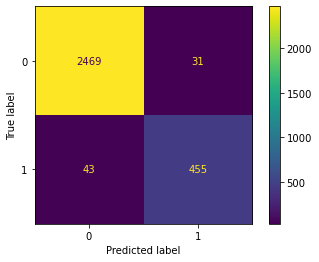

In [55]:
# Generate array of values for confusion matrix
preds = tree1.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels=tree1.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=tree1.classes_)
disp.plot(values_format='')

### Plot Random Forest Confusion Matrix

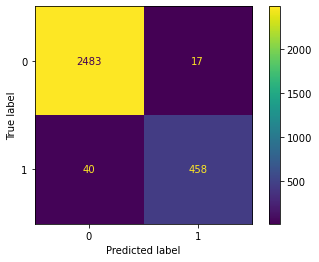

In [56]:
# Generate array of values for confusion matrix
preds = rf1.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels=rf1.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf1.classes_)
disp.plot(values_format='')

### Plot Decision Tree Split

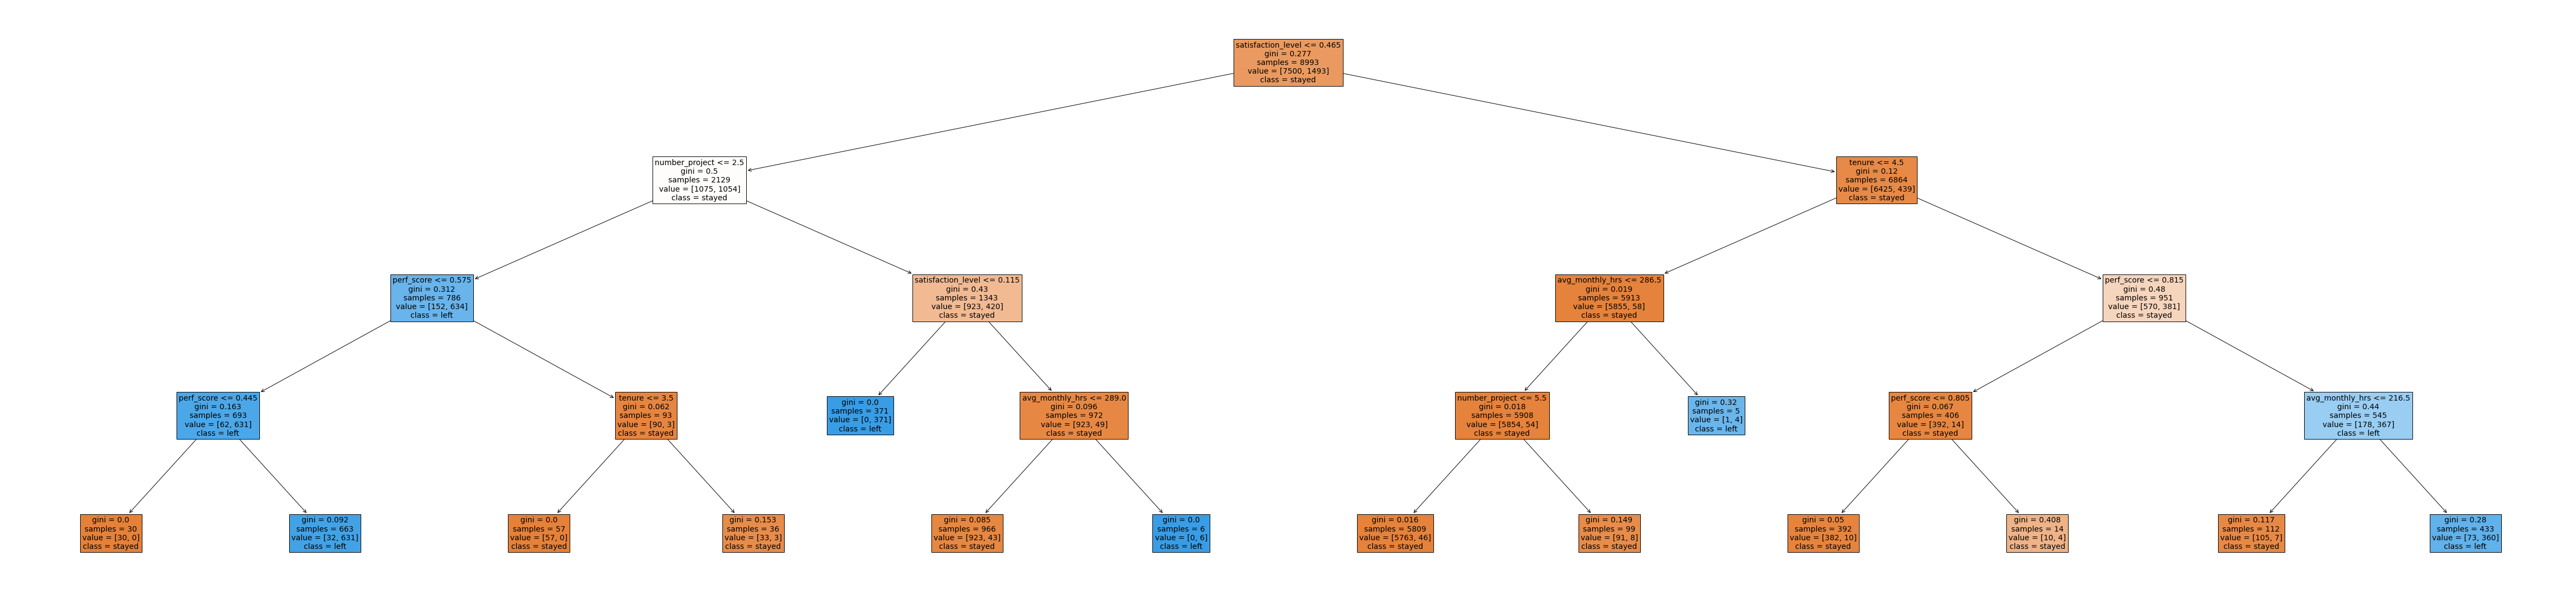

In [57]:
# Plot the tree
plt.figure(figsize=(85,20))
plot_tree(tree1.best_estimator_, max_depth=6, fontsize=14, feature_names=X.columns, 
          class_names={0:'stayed', 1:'left'}, filled=True);
plt.show()

### Plot Decision Tree Feature Importance

In [58]:
tree1_importances = pd.DataFrame(tree1.best_estimator_.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=X.columns
                                )
tree1_importances = tree1_importances.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
tree1_importances = tree1_importances[tree1_importances['gini_importance'] != 0]
tree1_importances

,gini_importance
satisfaction_level,0.524622
perf_score,0.178501
tenure,0.120792
number_project,0.117102
avg_monthly_hrs,0.058983


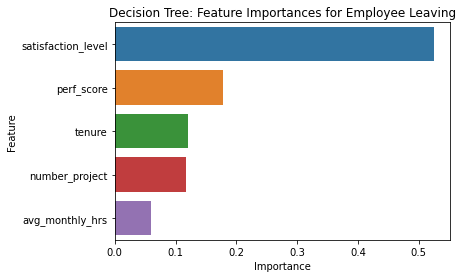

In [59]:
#plot
sns.barplot(data=tree1_importances, x="gini_importance", y=tree1_importances.index, orient='h')
plt.title("Decision Tree: Feature Importances for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()### Plot Decision Tree Feature Importance

### Plot Random Forest Feature Importance

In [60]:
# Get feature importances
feat_impt = rf1.best_estimator_.feature_importances_

# Get indices of top 10 features
ind = np.argpartition(rf1.best_estimator_.feature_importances_, -10)[-10:]

# Get column labels of top 10 features 
feat = X.columns[ind]

# Filter `feat_impt` to consist of top 10 feature importances
feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance", ascending=False)
y_sort_df

,Feature,Importance
9,satisfaction_level,0.493518
8,number_project,0.164313
4,perf_score,0.146839
6,tenure,0.116408
7,avg_monthly_hrs,0.077554
3,department_RandD,0.000244
5,salary,0.000209
2,department_technical,0.000181
1,department_IT,0.000152
0,department_marketing,0.000151


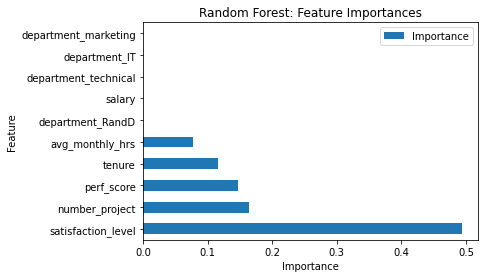

In [61]:
#plot
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Random Forest: Feature Importances", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

The most important features are satisfaction_level, number_project, perf_score, tenure, and avg_monthly_hrs.

# pacE: Execute Stage



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






## Step 4. Results and Evaluation




### Summary of model results

Random Forest outperforms Decision Tree with the following metrics of the test set: precision of 96.42%, recall of 91.96%, f1 of 94.14%, accuracy of 98%, and auc of 95.64%.

### Conclusion, Recommendations, Next Steps

The company may consider doing the following to prevent employees leaving:
- Have a limit of how many projects an employee only needs to do at once.
- Don't require or encourage employees to work long hours because this results in them feeling burnt out.
- Give more promotions and better compensations to high performing employees.
- Pay attention to their satisfaction level, spend resources on understanding their concerns and act on them.